In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
# Load and Explore the Dataset
# Load the dataset
data = pd.read_csv("winequality-red.csv", sep=";")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display dataset information
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   

In [91]:
# Data Preprocessing
# Separate features and target variable
X = data.drop(columns=["quality"])
y = data["quality"]

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [92]:
# Polynomial Linear Regression
# Step 1: Create polynomial features of degree 1(linear)
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Step 3: Make predictions
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

In [93]:
# Polynomial Regression Performance Evaluation
# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Print results
print("\nPolynomial Regression Performance:")
print(f"Train MSE: {mse_train_poly:.2f}, R2: {r2_train_poly:.2f}")
print(f"Test MSE: {mse_test_poly:.2f}, R2: {r2_test_poly:.2f}")


Polynomial Regression Performance:
Train MSE: 0.42, R2: 0.35
Test MSE: 0.39, R2: 0.40


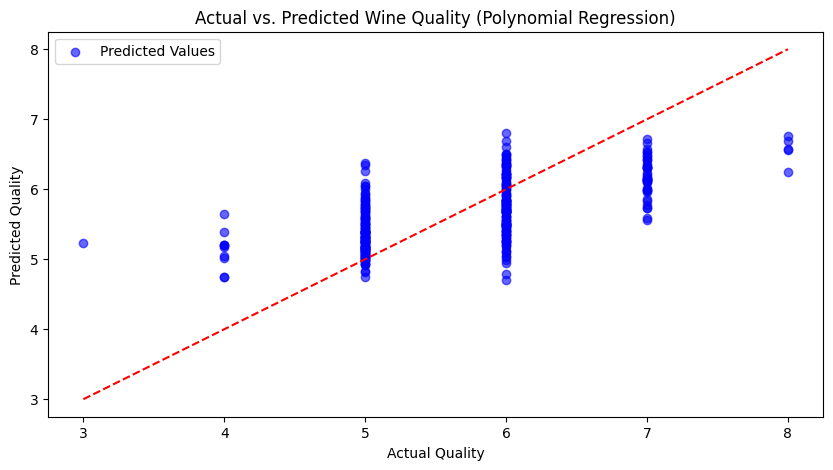

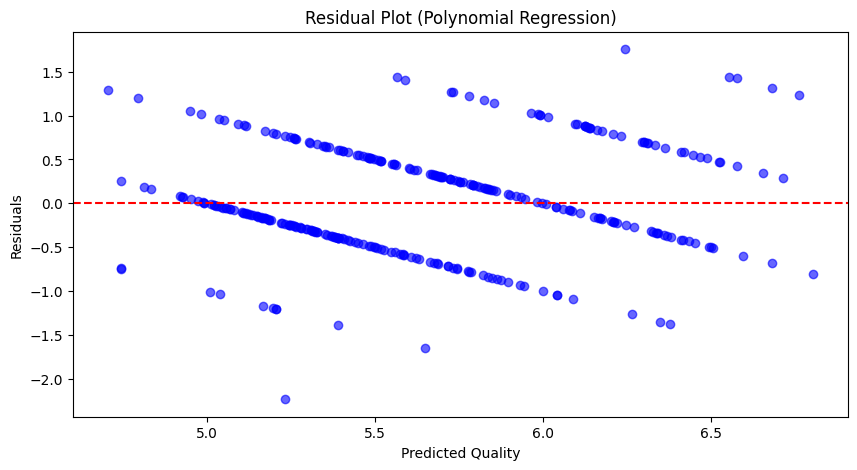

In [94]:
# Visualizations for Polynomial Regression
# Actual vs. Predicted Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred_poly, color='blue', label="Predicted Values", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality (Polynomial Regression)")
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test_pred_poly, y_test - y_test_pred_poly, color='blue', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.show()

In [95]:
# Polynomial Regression
# Step 1: Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Step 3: Make predictions
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

In [96]:
# Polynomial Regression Performance Evaluation
# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Print results
print("\nPolynomial Regression Performance:")
print(f"Train MSE: {mse_train_poly:.2f}, R2: {r2_train_poly:.2f}")
print(f"Test MSE: {mse_test_poly:.2f}, R2: {r2_test_poly:.2f}")


Polynomial Regression Performance:
Train MSE: 0.37, R2: 0.43
Test MSE: 0.38, R2: 0.42


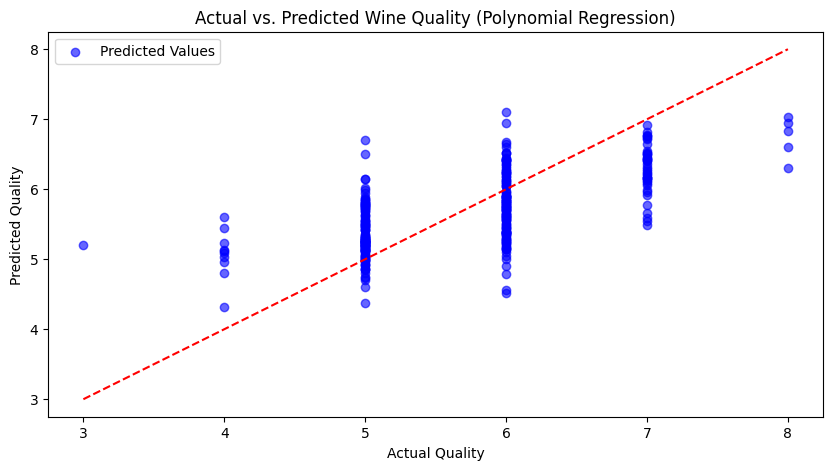

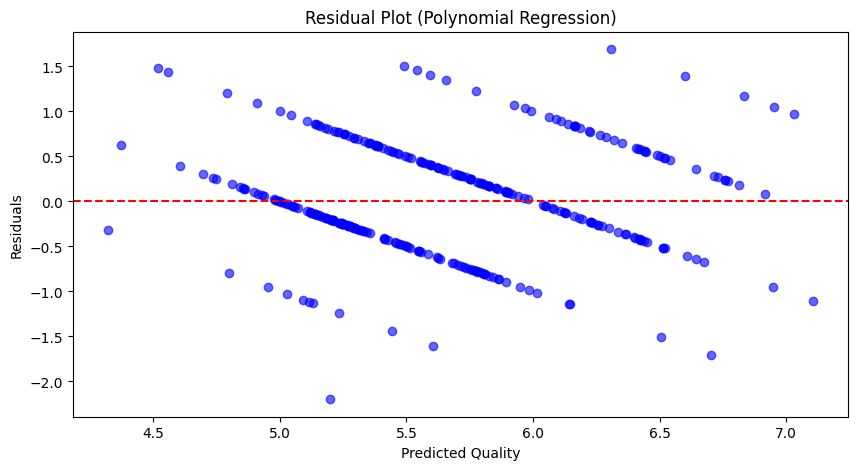

In [97]:
# Visualizations for Polynomial Regression
# Actual vs. Predicted Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred_poly, color='blue', label="Predicted Values", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality (Polynomial Regression)")
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test_pred_poly, y_test - y_test_pred_poly, color='blue', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.show()

In [98]:
# Polynomial Regression
# Step 1: Create polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Step 3: Make predictions
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

In [99]:
# Polynomial Regression Performance Evaluation
# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Print results
print("\nPolynomial Regression Performance:")
print(f"Train MSE: {mse_train_poly:.2f}, R2: {r2_train_poly:.2f}")
print(f"Test MSE: {mse_test_poly:.2f}, R2: {r2_test_poly:.2f}")


Polynomial Regression Performance:
Train MSE: 0.23, R2: 0.65
Test MSE: 0.66, R2: -0.00


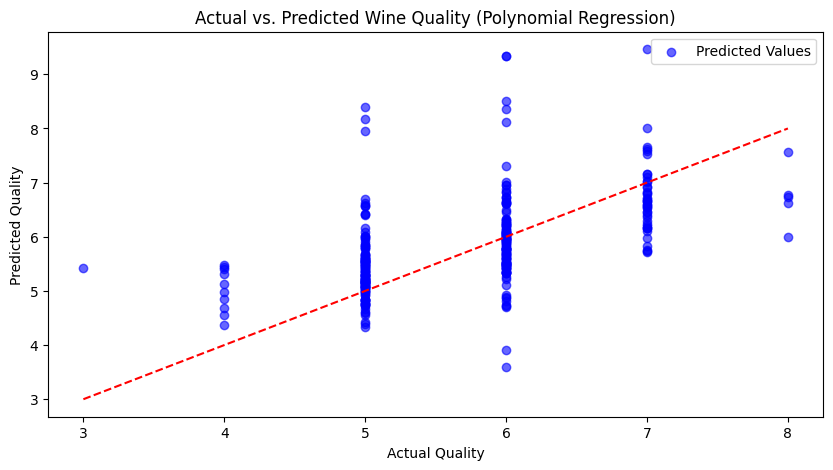

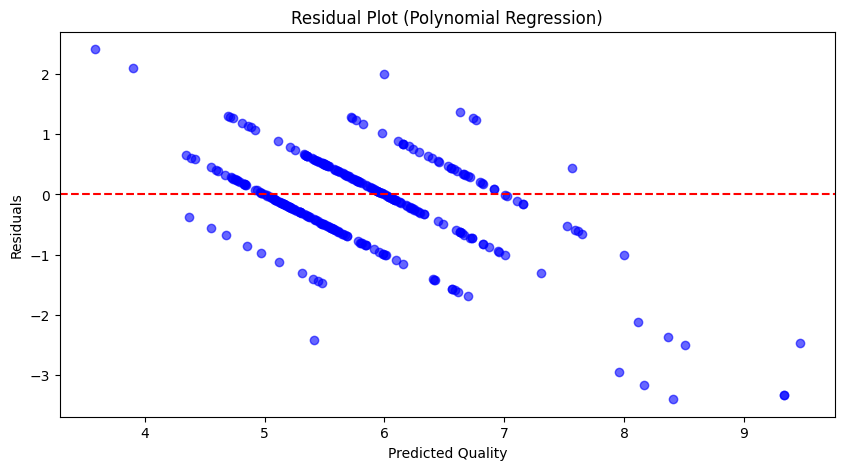

In [100]:
# Visualizations for Polynomial Regression
# Actual vs. Predicted Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred_poly, color='blue', label="Predicted Values", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality (Polynomial Regression)")
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test_pred_poly, y_test - y_test_pred_poly, color='blue', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.show()

In [101]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model with Ridge regularization
degree = 3  # Try a degree with Ridge regularization
alpha = 1.0  # Regularization strength

ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
ridge_model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Ridge Polynomial Regression Degree {degree}:")
print(f"Train MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}, R²: {test_r2:.2f}")


Ridge Polynomial Regression Degree 3:
Train MSE: 0.23, R²: 0.64
Test MSE: 0.55, R²: 0.16


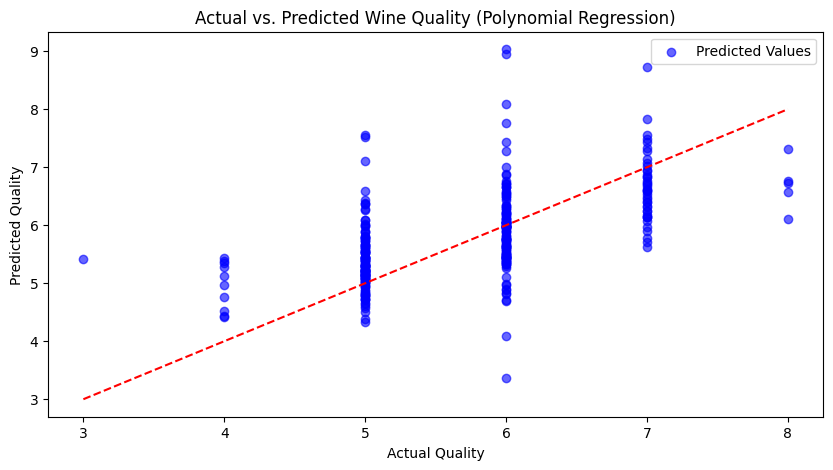

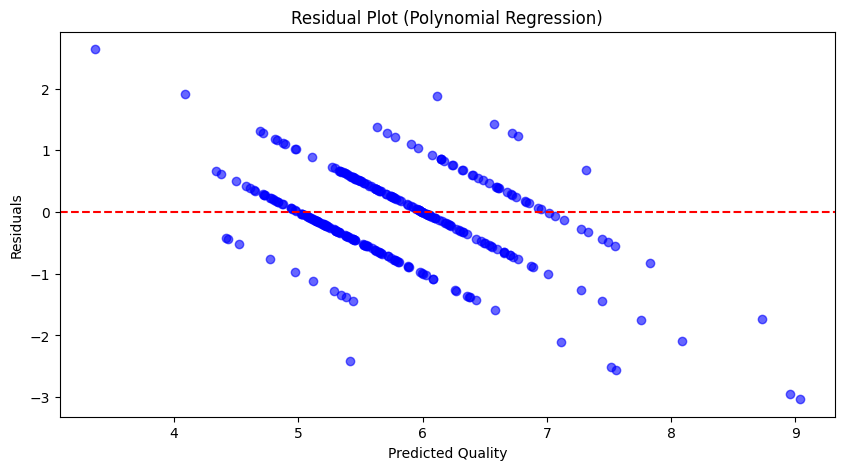

In [102]:
# Visualizations for Ridge Polynomial Regression
# Actual vs. Predicted Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred, color='blue', label="Predicted Values", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality (Polynomial Regression)")
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test_pred, y_test - y_test_pred, color='blue', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.show()

In [103]:
# Hyperparameter Tuning and cross validation for ridge polynomial regression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'ridge__alpha': [0, 77,78,79]
}

# Create a pipeline for polynomial features and Ridge regression
ridge_pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Set up GridSearchCV
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score:.2f}")

Best parameters: {'polynomialfeatures__degree': 1, 'ridge__alpha': 78}
Best Cross-Validation MSE: 0.44


In [104]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model with Ridge regularization
degree = 1  # Try a degree with Ridge regularization
alpha = 78  # Regularization strength

ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
ridge_model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Ridge Polynomial Regression Degree {degree}:")
print(f"Train MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

Ridge Polynomial Regression Degree 1:
Train MSE: 0.42, R²: 0.35
Test MSE: 0.39, R²: 0.40


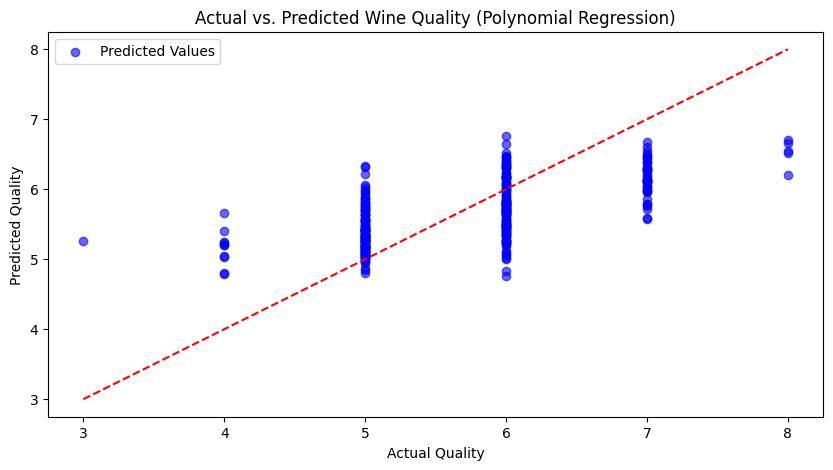

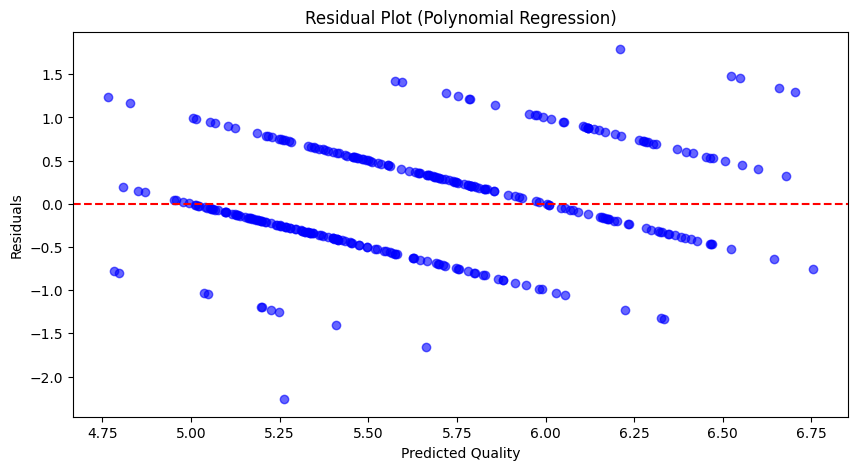

In [105]:
# Visualizations for Ridge Polynomial Regression
# Actual vs. Predicted Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred, color='blue', label="Predicted Values", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality (Polynomial Regression)")
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test_pred, y_test - y_test_pred, color='blue', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.show()

In [106]:
# Random Forest Regression
# Step 1: Train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_features=None,  # Can also be 'auto', 'log2', or a number/int
    max_depth=None,       # Adjust the depth for tuning
    random_state=42
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Step 2: Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [107]:
# Random Forest Regression Performance Evaluation
# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print results
print("\nRandom Forest Regression Performance:")
print(f"Train MSE: {mse_train_rf:.2f}, R2: {r2_train_rf:.2f}")
print(f"Test MSE: {mse_test_rf:.2f}, R2: {r2_test_rf:.2f}")


Random Forest Regression Performance:
Train MSE: 0.05, R2: 0.93
Test MSE: 0.30, R2: 0.54


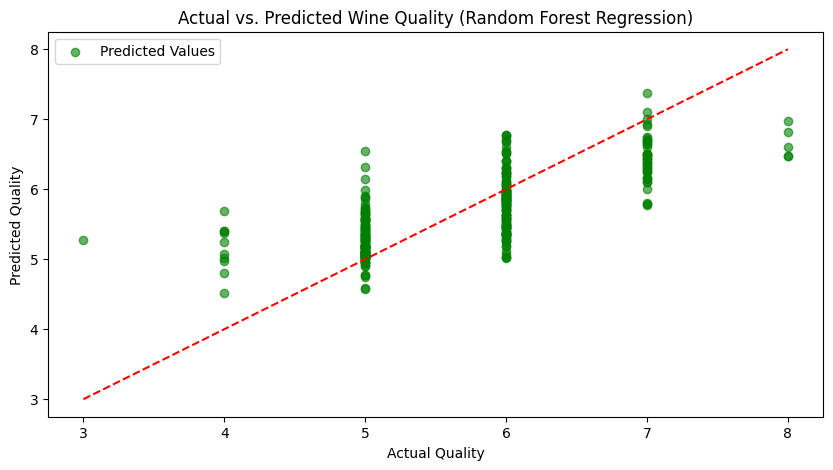

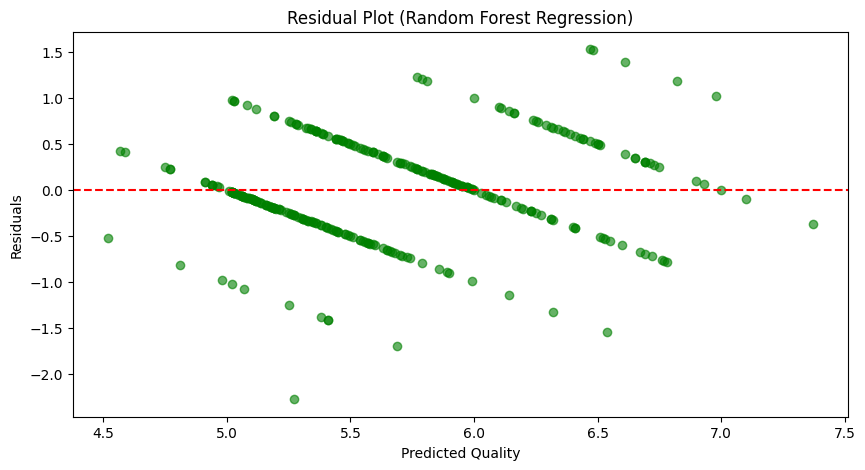

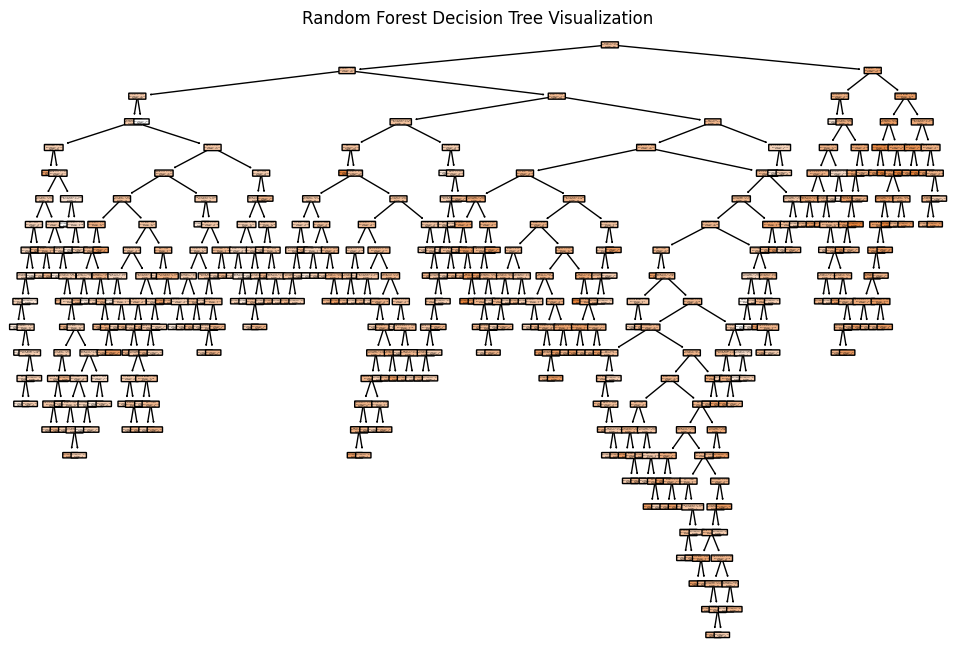

In [108]:
from sklearn.tree import plot_tree

# Visualizations for Random Forest Regression
# Actual vs. Predicted Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred_rf, color='green', label="Predicted Values", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality (Random Forest Regression)")
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test_pred_rf, y_test - y_test_pred_rf, color='green', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest Regression)")
plt.show()

# Decision Tree visualization from Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.title('Random Forest Decision Tree Visualization')
plt.show()  # Show plot one by one

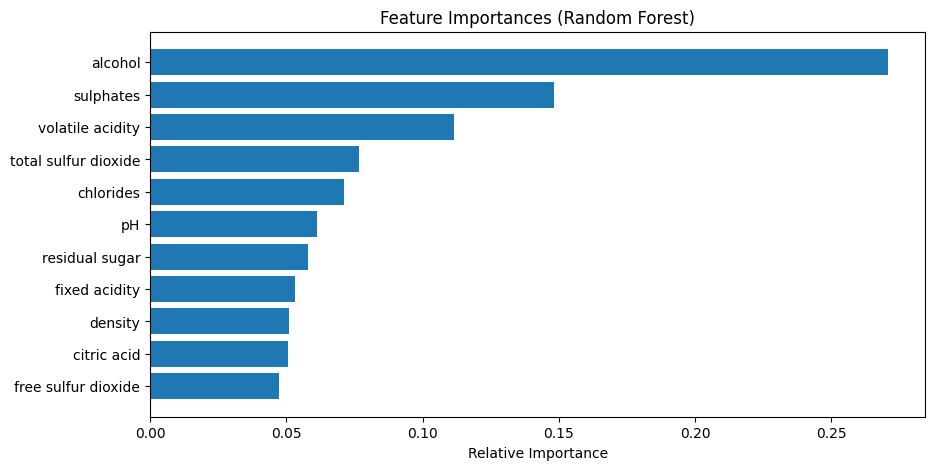

In [109]:
# Feature Importance Plot for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), np.array(X.columns)[indices])
plt.xlabel("Relative Importance")
plt.show()

In [110]:
# Cross-Validation for Random Forest Regression
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print(f"\nRandom Forest Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Random Forest Cross-Validation Scores: [0.25336784 0.33990411 0.36533295 0.31758751 0.264451  ]
Mean Cross-Validation Score: 0.31


In [111]:
# Hyperparameter Tuning for Random Forest Regression
# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [802, 803, 804],
    'max_features': ['sqrt', 'log2'],  # Changed 'auto' to valid options
    'max_depth': [19, 20, 21],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"\nBest Parameters from Grid Search: {best_params}")
print(f"Best Mean Squared Error from Grid Search: {best_score:.2f}")

c:\Users\JQgam\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Parameters from Grid Search: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 802}
Best Mean Squared Error from Grid Search: 0.36


In [112]:
# Random Forest Regression
# Step 1: Train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=802,
    max_features='sqrt',  # Can also be 'auto', 'log2', or a number/int
    max_depth=20,       # Adjust the depth for tuning
    random_state=42
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Step 2: Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [113]:
# Random Forest Regression Performance Evaluation
# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print results
print("\nRandom Forest Regression Performance:")
print(f"Train MSE: {mse_train_rf:.2f}, R2: {r2_train_rf:.2f}")
print(f"Test MSE: {mse_test_rf:.2f}, R2: {r2_test_rf:.2f}")


Random Forest Regression Performance:
Train MSE: 0.05, R2: 0.93
Test MSE: 0.29, R2: 0.55


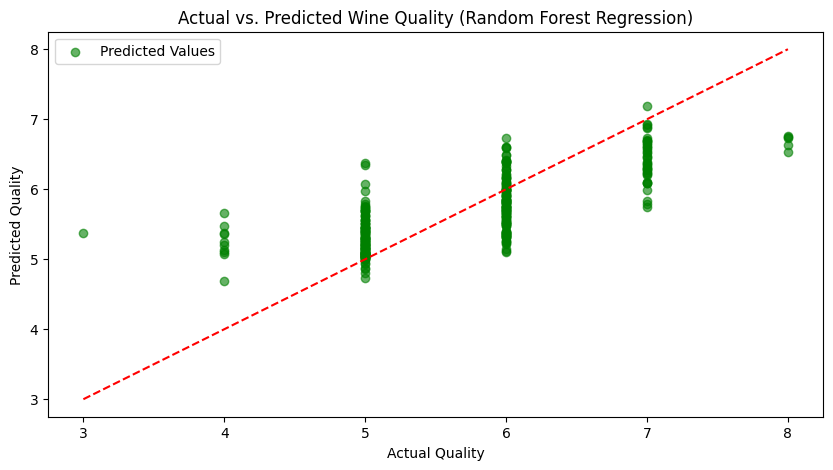

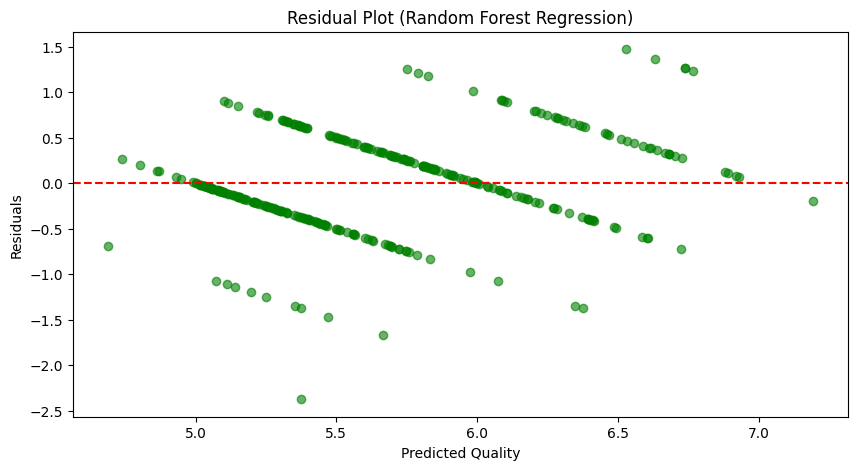

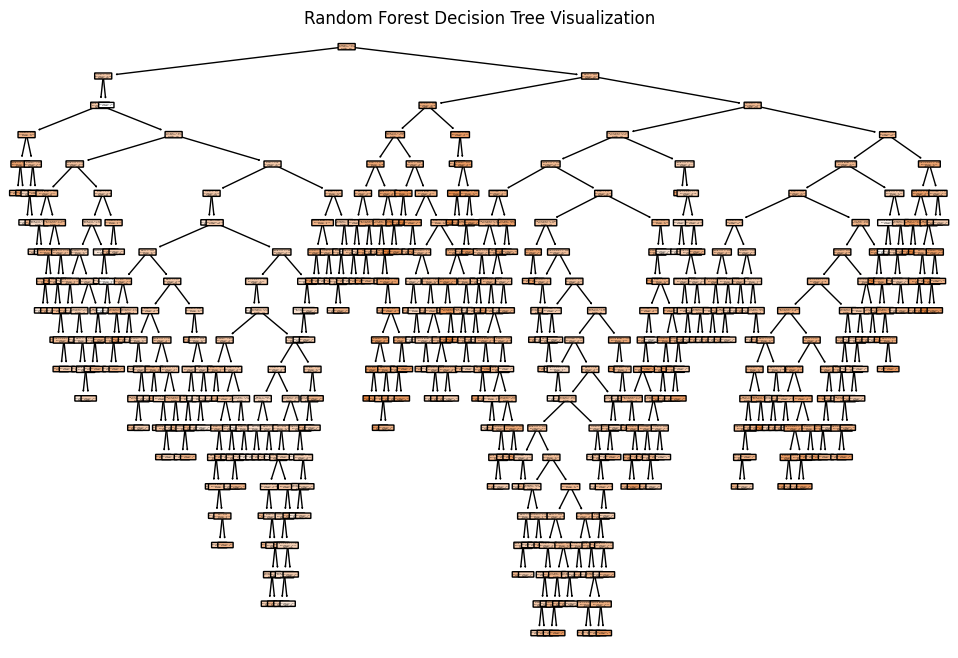

In [114]:
# Visualizations for Random Forest Regression
# Actual vs. Predicted Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred_rf, color='green', label="Predicted Values", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality (Random Forest Regression)")
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test_pred_rf, y_test - y_test_pred_rf, color='green', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest Regression)")
plt.show()

# Decision Tree visualization from Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.title('Random Forest Decision Tree Visualization')
plt.show()  # Show plot one by one

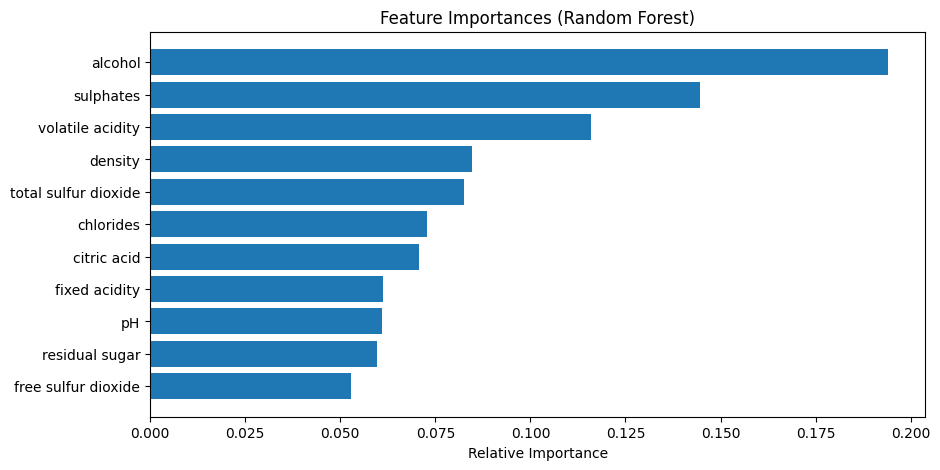

In [115]:
# Feature Importance Plot for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), np.array(X.columns)[indices])
plt.xlabel("Relative Importance")
plt.show()

In [116]:
# Cross-Validation for Random Forest Regression
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print(f"\nRandom Forest Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Random Forest Cross-Validation Scores: [0.24757929 0.36208255 0.39577427 0.34109227 0.30286569]
Mean Cross-Validation Score: 0.33
